> 로지스틱 회귀분석

In [43]:
from keras.datasets import mnist
# 학습용과 검증용 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터 전처리
# 28x28 => 784로 변환
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
    # sklearn은 2차원 데이터로 바꿔야 에러 안남
    # 255로 나누는거 -> 정규화(스케일링)
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9392833333333334
검증용: 0.9256


In [3]:
#모형 저장
import pickle
pickle.dump(model, open('c:/vscode/data/mnist/mnist_logit.model','wb'))

In [4]:
# 모형 불러오기
# model = pickle.load(open('c:/data/mnist/mnist_logit.model', 'rb'))

# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

예측값: [7 2 1 0 4 1 4 9 6 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


,0,1,2,3,4,5,6,7,8,9
0,955,0,2,4,1,10,4,3,1,0
1,0,1110,5,2,0,2,3,2,11,0
2,6,9,930,14,10,3,12,10,34,4
3,4,1,16,925,1,23,2,10,19,9
4,1,3,7,3,921,0,6,5,6,30
5,9,2,3,35,10,777,15,6,31,4
6,8,3,8,2,6,16,912,2,1,0
7,1,7,23,7,6,1,0,947,4,32
8,9,11,6,22,7,29,13,10,855,12
9,9,8,1,9,21,7,0,21,9,924


> 의사결정나무

In [5]:
# 트리는 스케일링 중요x. 어차피 해도 잘 안맞음.

In [44]:
from sklearn.tree import DecisionTreeClassifier
#트리 모델 생성(이미지 100장만 학습)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train[:1000], y_train[:1000])
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.6883666666666667
검증용: 0.6946


In [45]:
#모형 저장
import pickle
pickle.dump(model, open('c:/vscode/data/mnist/mnist_tree.model','wb'))

In [46]:
# 모형 불러오기
# model = pickle.load(open('c:/data/mnist/mnist_tree.model','rb'))
# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

예측값: [7 2 1 0 4 1 4 3 1 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


,0,1,2,3,4,5,6,7,8,9
0,770,2,46,17,6,29,21,37,8,44
1,0,962,35,9,4,28,11,49,32,5
2,37,76,655,30,23,17,67,87,14,26
3,20,15,37,608,28,123,34,41,52,52
4,5,20,13,31,683,28,43,39,45,75
5,23,18,18,57,43,554,56,31,41,51
6,27,22,63,12,98,52,630,13,30,11
7,4,9,31,7,22,24,9,872,7,43
8,19,40,56,42,26,51,60,38,575,67
9,12,14,25,47,45,68,17,106,38,637


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       980
           1       0.82      0.85      0.83      1135
           2       0.67      0.63      0.65      1032
           3       0.71      0.60      0.65      1010
           4       0.70      0.70      0.70       982
           5       0.57      0.62      0.59       892
           6       0.66      0.66      0.66       958
           7       0.66      0.85      0.74      1028
           8       0.68      0.59      0.63       974
           9       0.63      0.63      0.63      1009

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



> 랜덤포레스트

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train[:1000], y_train[:1000])
print("학습용:",forest.score(X_train, y_train))
print("검증용:",forest.score(X_test, y_test))

학습용: 0.88275
검증용: 0.8842


In [11]:
#모형 저장
import pickle
pickle.dump(forest, open('c:/vscode/data/mnist/mnist_rf.model', 'wb'))

In [12]:
# 모형 불러오기
# model = pickle.load(open('c:/vscode/data/mnist/mnist_rf.model', 'rb'))

# 모형 사용
pred = forest.predict(X_test[:100])
print('예측값:',pred[:100])
print('실제값:',y_test[:100])

from sklearn.metrics import confusion_matrix
import pandas as pd
pred=forest.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

예측값: [7 2 1 0 4 1 4 9 4 9 0 2 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 4 5 2 0 4 1 9 4 7 2 9 2 9 9 6 4 3 0 7 0 2 7
 1 7 3 7 9 7 9 6 2 7 8 4 7 5 6 1 3 6 9 3 1 4 1 7 6 9]
실제값: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


,0,1,2,3,4,5,6,7,8,9
0,960,0,0,0,0,5,6,3,5,1
1,0,1112,5,1,0,2,1,2,12,0
2,12,5,916,8,19,3,13,35,17,4
3,13,6,31,834,2,80,1,17,19,7
4,1,4,3,0,839,2,21,3,6,103
5,24,12,3,26,32,715,10,12,20,38
6,20,4,17,1,41,16,849,0,9,1
7,2,10,27,3,10,0,0,938,3,35
8,8,6,14,27,14,32,12,10,798,53
9,6,6,10,15,43,7,3,33,5,881


> 사례기반추론

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

[0.83, 0.83, 0.83, 0.81, 0.84, 0.84, 0.81, 0.84, 0.82, 0.84]
최적의 k: 5
최고 정확도: 0.84


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


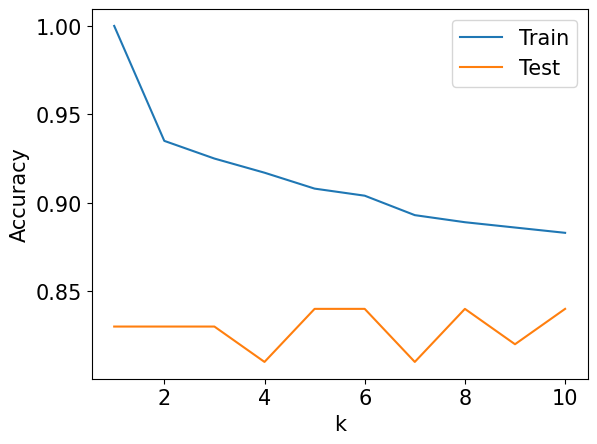

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용
train_rate = []
test_rate = []
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train[:1000], y_train[:1000])
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train[:1000], y_train[:1000]))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test[:100], y_test[:100]))
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()

print(test_rate)
max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k:',idx+1)
print('최고 정확도:',max_rate)

In [14]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train[:1000], y_train[:1000])
print("학습용:",model.score(X_train[:1000], y_train[:1000]))
print("검증용:",model.score(X_test[:100], y_test[:100]))

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


학습용: 0.893
검증용: 0.81


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
#모형 저장
import pickle
pickle.dump(model, open('c:/vscode/data/mnist/mnist_knn.model', 'wb'))

In [16]:
# 모형 불러오기
# model = pickle.load(open('c:/vscode/data/mnist/mnist_knn.model', 'rb'))

# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


예측값: [7 2 1 0 4 1 4 9 4 7]
실제값: [7 2 1 0 4 1 4 9 5 9]


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,0,1,2,3,4,5,6,7,8,9
0,944,1,3,0,2,13,14,1,1,1
1,0,1128,2,1,0,0,4,0,0,0
2,25,113,784,15,11,4,12,50,16,2
3,3,30,19,862,1,46,1,17,19,12
4,0,35,1,0,772,0,16,8,0,150
5,14,33,3,51,14,707,14,5,10,41
6,24,20,5,1,21,10,876,0,1,0
7,0,62,5,2,17,0,0,889,0,53
8,30,38,14,38,21,46,17,24,690,56
9,9,12,4,9,53,1,6,43,2,870


> SVM

In [17]:
#시간이 오래 걸리므로 이미지 100장만 학습
from sklearn.svm import SVC
model = SVC()
model.fit(X_train[:1000], y_train[:1000])
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9062833333333333
검증용: 0.9083


In [18]:
#최적의 C value와 gamma value를 찾는 과정
import matplotlib.pyplot as plt
import numpy as np

train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델 생성
        model = SVC(C=n,gamma=g,random_state=10)
        model.fit(X_train[:1000], y_train[:1000])
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,model.score(X_train[:1000],y_train[:1000])])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,model.score(X_test[:100],y_test[:100])])
train_arr=np.array(train_rate) #검증용 데이터셋의 정확도
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도
idx=np.where(test_arr[:,2] == max_rate)[0][0] #가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

최적의 c: 10
최적의 gamma: 0.01
최적의 정확도: 0.94


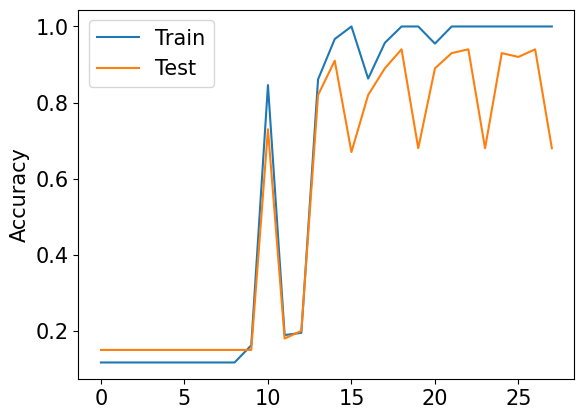

In [19]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="Train")
plt.plot(range(len(test_rate)), test_arr[:,2], label="Test")
plt.ylabel("Accuracy")
plt.legend()

In [20]:
model = SVC(C=10, gamma=0.01)
model.fit(X_train[:1000], y_train[:1000])
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9108166666666667
검증용: 0.9126


In [21]:
#모형 저장
import pickle
pickle.dump(model, open('c:/vscode/data/mnist/mnist_svm.model', 'wb'))

In [22]:
# 모형 불러오기
# model = pickle.load(open('c:/vscode/data/mnist/mnist_svm.model', 'rb'))

# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

예측값: [7 2 1 0 4 1 4 9 2 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


,0,1,2,3,4,5,6,7,8,9
0,958,0,3,0,5,4,6,2,2,0
1,0,1108,2,1,0,2,3,2,16,1
2,11,3,956,6,11,3,12,15,14,1
3,2,1,27,838,0,79,3,14,36,10
4,1,1,3,0,893,0,12,1,2,69
5,9,7,8,20,8,803,11,8,10,8
6,8,3,18,0,10,17,901,0,1,0
7,0,17,21,10,11,1,0,933,2,33
8,12,1,13,15,13,47,13,14,826,20
9,9,4,6,9,29,10,1,28,3,910


> 인공신경망, sklearn

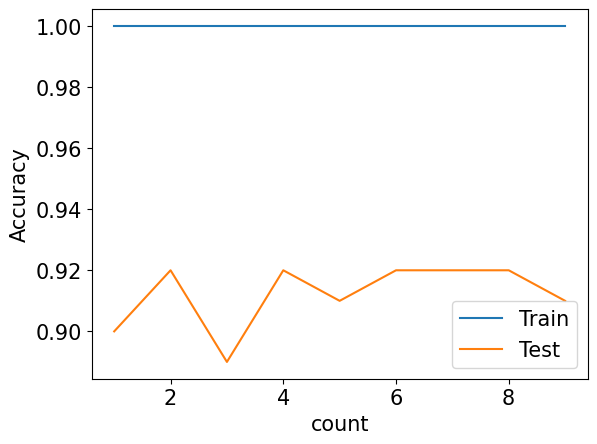

In [23]:
# 최적의 은닉노드 개수를 구하기 위한 실험
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=100,
        hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train[:1000],y_train[:1000])
        train_rate.append(model.score(X_train[:1000],y_train[:1000]))
        test_rate.append(model.score(X_test[:100],y_test[:100]))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [24]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('idx:',idx)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
            break
    cnt+=1

idx: 1
최적의 정확도: 0.92
200 100


In [25]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(hidden_layer_sizes=[100,200],random_state=100)
model.fit(X_train[:1000],y_train[:1000])
print("학습용:",model.score(X_train[:1000], y_train[:1000]))
print("검증용:",model.score(X_test[:100], y_test[:100]))

학습용: 1.0
검증용: 0.92


In [26]:
#모형 저장
import pickle
pickle.dump(model, open('c:/vscode/data/mnist/mnist_ann.model', 'wb'))

In [27]:
# 모형 불러오기
# model = pickle.load(open('c:/vscode/data/mnist/mnist_ann.model', 'rb'))

# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

예측값: [7 2 1 0 4 1 4 9 6 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


,0,1,2,3,4,5,6,7,8,9
0,949,0,6,2,0,2,10,5,3,3
1,0,1109,2,1,0,1,4,3,14,1
2,10,5,919,15,10,2,18,18,30,5
3,3,1,31,813,2,87,6,22,32,13
4,1,3,7,3,859,1,17,4,11,76
5,14,4,7,22,19,737,17,15,32,25
6,14,3,17,0,8,36,871,2,7,0
7,0,12,24,10,10,1,2,931,0,38
8,17,9,19,18,13,43,17,24,778,36
9,13,4,5,19,28,15,1,65,4,855


> 인공신경망, keras

In [28]:
from tensorflow.keras import datasets
from keras.utils import np_utils
# 데이터 로드
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])

# one hot encoding
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape

# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [29]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):
    #모델 초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', 
                    input_shape=(input_number,)))
    model.add(Dense(layers[1], activation='relu'))
    model.add(Dense(layers[2], activation='relu'))
    # 드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))
    #출력층
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
input_number = 784 #28x28
#은닉계층 3개, 은닉노드수 128개, 64개, 32개
hidden_layers = [128, 64, 32]
print(hidden_layers)
number_of_class = 10
output_number = number_of_class

#모델 생성
model = make_model(input_number, hidden_layers, output_number)

[128, 64, 32]


Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.5117 - accuracy: 0.8484 - val_loss: 0.1828 - val_accuracy: 0.9483
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.9425 - val_loss: 0.1375 - val_accuracy: 0.9588
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.1455 - accuracy: 0.9586 - val_loss: 0.1247 - val_accuracy: 0.9632
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1108 - accuracy: 0.9680 - val_loss: 0.1158 - val_accuracy: 0.9672
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9727 - val_loss: 0.0992 - val_accuracy: 0.9706


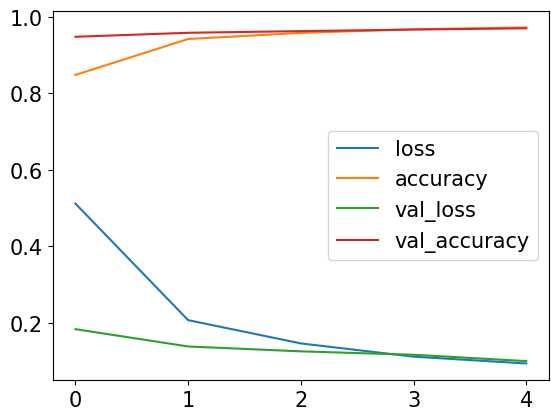

In [31]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=128,
validation_split=0.2)

# 모델 학습 과정 표시
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()

In [32]:
#모델 평가
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9732


[0.08857729285955429, 0.9732000231742859]

In [33]:
#모형 저장
# import pickle
# pickle.dump(model, open('c:/vscode/data/mnist/mnist_keras.model', 'wb'))
model.save('c:/vscode/data/mnist/mnist_keras.model')

INFO:tensorflow:Assets written to: c:/vscode/data/mnist/mnist_keras.model\assets


> CNN

In [34]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#데이터 로딩
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

#케라스에서 처리할 수 있는 형태로 변환 샘플개수x가로x세로x차원(3차원)
# 사이킷런은 2차원 데이터
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32") / 255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32") / 255

#원 핫 인코딩
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
from keras import layers
from keras import models

#모델 생성
model=models.Sequential()

#convolution layer, 필터개수 32, 필터크기 3x3,
#입력데이터 28x28x1 (흑백이미지1, 컬러이미지3)
model.add(layers.Conv2D(32, (3,3), activation="relu",
                        input_shape=(28,28,1)))

#맥스풀링 필터사이즈 2x2
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

#fully connected layer로 변환(완전연결층)
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))

#출력층 10개의 숫자로 분류
model.add(layers.Dense(10,activation="softmax"))
model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [36]:
#모델 학습
hist=model.fit(train_images, train_labels, epochs=5)

#검증용 데이터로 모델의 성능 평가
test_loss,test_acc=model.evaluate(test_images, test_labels)
test_loss,test_acc

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1415 - accuracy: 0.9547
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0457 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0321 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0265 - accuracy: 0.9923
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9885


(0.03784998878836632, 0.9884999990463257)

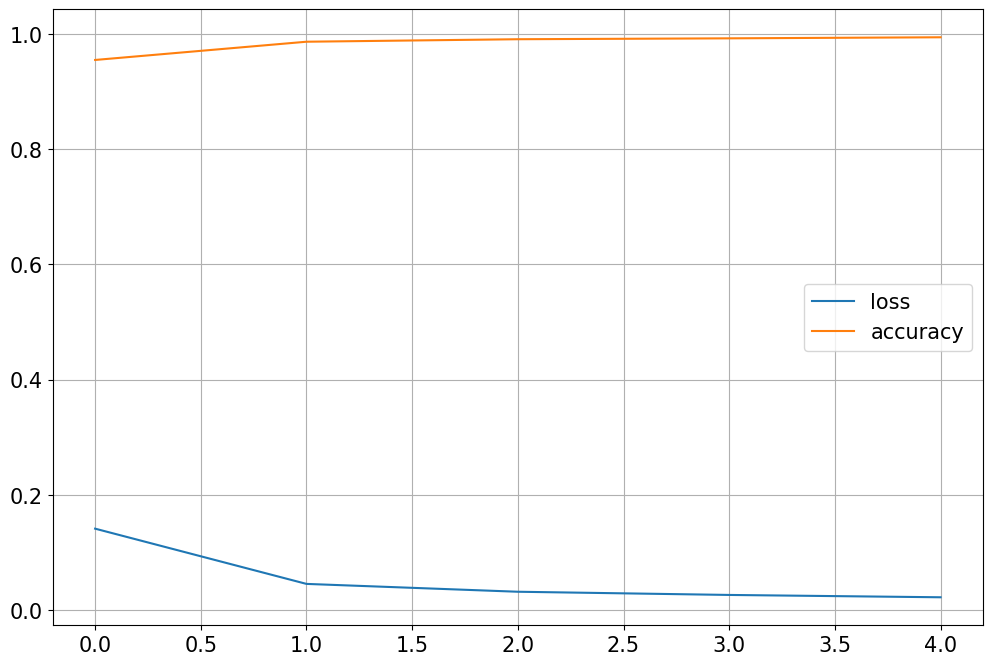

In [37]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [38]:
# import pickle
# pickle.dump(model, open('c:/vscode/data/mnist/mnist_cnn.model', 'wb'))
model.save('c:/vscode/data/mnist/mnist_cnn.h5')